<a href="https://colab.research.google.com/github/AnaFerreira015/dip-2024-2/blob/main/task_07_histogram_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q scikit-image

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms
from google.colab import files
from PIL import Image

In [4]:
uploaded = files.upload()
filenames = list(uploaded.keys())
source_path = filenames[0]
reference_path = filenames[1]

Saving source.jpg to source.jpg
Saving reference.jpg to reference.jpg


In [5]:
source_bgr = cv2.imread(source_path)
reference_bgr = cv2.imread(reference_path)

source_rgb = cv2.cvtColor(source_bgr, cv2.COLOR_BGR2RGB)
reference_rgb = cv2.cvtColor(reference_bgr, cv2.COLOR_BGR2RGB)

In [6]:
def match_histograms_rgb(source_img: np.ndarray, reference_img: np.ndarray) -> np.ndarray:
    """
    Faz histogram matching canal a canal (R, G, B) usando skimage.
    """
    matched = match_histograms(source_img, reference_img, channel_axis=2)
    return matched.astype(np.uint8)

In [7]:
matched = match_histograms_rgb(source_rgb, reference_rgb)

In [8]:
plt.figure(figsize=(15,5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

(np.float64(-0.5), np.float64(670.5), np.float64(899.5), np.float64(-0.5))

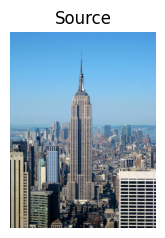

In [9]:
plt.subplot(1,3,1)
plt.imshow(source_rgb)
plt.title("Source")
plt.axis("off")

(np.float64(-0.5), np.float64(531.5), np.float64(764.5), np.float64(-0.5))

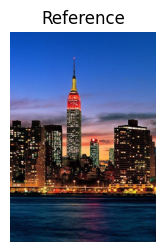

In [10]:
plt.subplot(1,3,2)
plt.imshow(reference_rgb)
plt.title("Reference")
plt.axis("off")

(np.float64(-0.5), np.float64(670.5), np.float64(899.5), np.float64(-0.5))

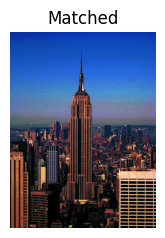

In [11]:
plt.subplot(1,3,3)
plt.imshow(matched)
plt.title("Matched")
plt.axis("off")

In [12]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [13]:
def plot_rgb_histograms(img, title):
    colors = ('r', 'g', 'b')
    plt.figure()
    for i, c in enumerate(colors):
        hist, _ = np.histogram(img[:,:,i], bins=256, range=(0, 255))
        plt.plot(hist, color=c)
    plt.title(f"Histogram - {title}")
    plt.xlabel("Pixel value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

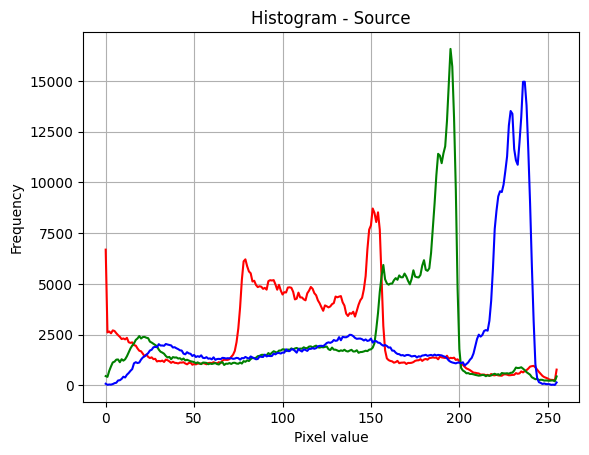

In [14]:
plot_rgb_histograms(source_rgb, "Source")

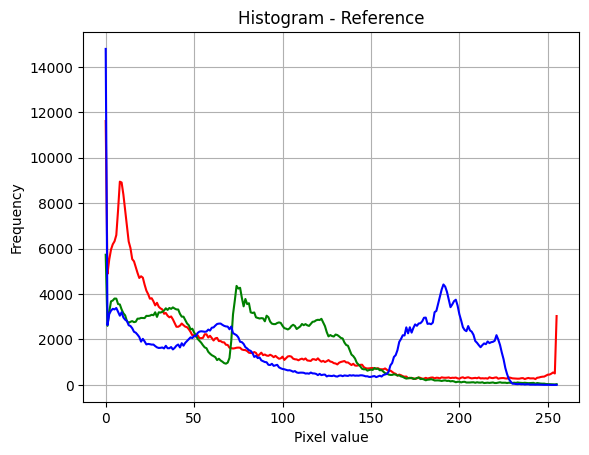

In [15]:
plot_rgb_histograms(reference_rgb, "Reference")

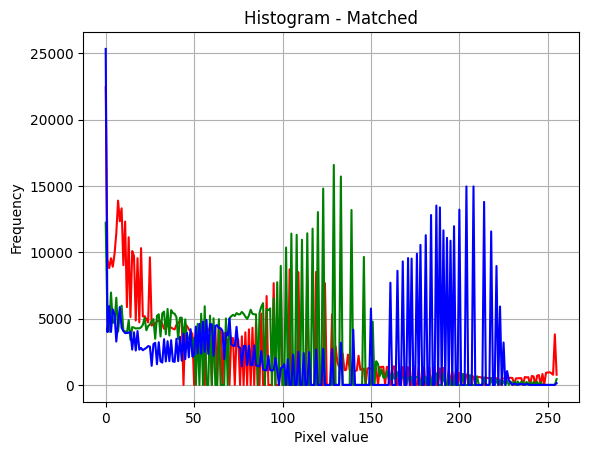

In [16]:
plot_rgb_histograms(matched, "Matched")